# Lab 2: EDA on Corpora

![](../figs/deep_nlp/lab/eda.png)

## Prepare the environment

```python
%pip install --pre ekorpkit[dataset]
```

In [1]:
%config InlineBackend.figure_format='retina'
%load_ext autotime

from ekorpkit import eKonf

eKonf.setLogger("INFO")
print("version:", eKonf.__version__)

is_colab = eKonf.is_colab()
print("is colab?", is_colab)
if is_colab:
    eKonf.mount_google_drive()
project_dir = eKonf.set_workspace(workspace="/content/drive/MyDrive/workspace/", project="ekorpkit-book")
print("project_dir:", project_dir)

INFO:ekorpkit.utils.notebook:Google Colab not detected.
INFO:ekorpkit.base:Setting EKORPKIT_WORKSPACE_ROOT to /content/drive/MyDrive/workspace/
INFO:ekorpkit.base:Setting EKORPKIT_PROJECT to ekorpkit-book
INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env


version: 0.1.40.post0.dev6
is colab? False
project_dir: /content/drive/MyDrive/workspace/projects/ekorpkit-book
time: 1.64 s (started: 2022-11-04 07:05:43 +00:00)


## Load the saved corpora

In [2]:
data = eKonf.load_data("wiki_corpus.parquet", project_dir + "/data")

INFO:ekorpkit.io.file:Processing [1] files from ['wiki_corpus.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/content/drive/MyDrive/workspace/projects/ekorpkit-book/data/wiki_corpus.parquet']
INFO:ekorpkit.io.file:Loading data from /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/wiki_corpus.parquet


time: 15 s (started: 2022-11-04 07:05:46 +00:00)


In [3]:
data.head()

,id,text,split,filename,corpus
0,4915400,,train,wiki_92,enwiki_sampled
1,7644961,Anaissini is a tribe of click beetles in the f...,train,wiki_49,enwiki_sampled
2,6658552,The Vicky Metcalf Award for Literature for You...,train,wiki_24,enwiki_sampled
3,16385169,Shri Shivabalayogi Maharaj (24 January 1935 – ...,train,wiki_36,enwiki_sampled
4,11081255,Eylex Films Pvt is a chain of multiplex and si...,train,wiki_94,enwiki_sampled


time: 11.7 ms (started: 2022-11-04 07:06:02 +00:00)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522593 entries, 0 to 2522592
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   id        int64 
 1   text      object
 2   split     object
 3   filename  object
 4   corpus    object
dtypes: int64(1), object(4)
memory usage: 96.2+ MB
time: 5.84 ms (started: 2022-11-04 07:06:03 +00:00)


### Filter and use only selected corpora

In [5]:
enko = data[data.corpus.isin(["enwiki_sampled", "kowiki"])]
enko.tail()

,id,text,split,filename,corpus
2174042,1339043,《그랜드 테프트 오토 2》()는 1999년 8월 22일 전 세계적으로 발매된 록스타...,train,wiki_34,kowiki
2174043,1339044,알아크사 모스크( المسجد الأقصى; מסגד אל-אקצא; Al-Aqsa...,train,wiki_34,kowiki
2174044,1339045,PlanetBoom(함경민)은 펜타비전에서 사운드 프로듀서를 맡고 있는 대한민국의 ...,train,wiki_34,kowiki
2174045,1339046,,train,wiki_34,kowiki
2174046,1339047,"《그랜드 테프트 오토 3》(, GTA III) 은 DMA디자인(현재의 록스타 노스)...",train,wiki_34,kowiki


time: 218 ms (started: 2022-11-04 07:06:09 +00:00)


## Basic statistics

In [6]:
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
import seaborn as sns

nltk.download("punkt")

# Character counts
enko["num_chars"] = enko["text"].map(lambda x: len(x))
# Word counts
enko["num_words"] = enko["text"].map(lambda x: len(x.split()))


time: 14.3 s (started: 2022-11-04 07:06:13 +00:00)


In [7]:
# format pandas display options
import pandas as pd

pd.options.display.float_format = "{:.0f}".format

# min, max, mean, median, iqr, std
enko[["num_chars", "num_words"]].describe()

,num_chars,num_words
count,2174047,2174047
mean,513,92
std,2274,391
min,0,0
25%,0,0
50%,0,0
75%,184,35
max,264937,45338


time: 130 ms (started: 2022-11-04 07:06:35 +00:00)


In [8]:
# filter out outliers

enko_filtered = enko[enko.num_words.between(10, 250)]

time: 64.4 ms (started: 2022-11-04 07:06:36 +00:00)


In [9]:
# save filtered data

eKonf.save_data(enko_filtered, "enko_filtered.parquet", project_dir + "/data")

INFO:ekorpkit.io.file:Saving dataframe to /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/enko_filtered.parquet


time: 30.9 s (started: 2022-11-04 07:06:38 +00:00)


In [10]:
enko_filtered[["num_chars", "num_words"]].describe()

,num_chars,num_words
count,603719,603719
mean,379,72
std,343,62
min,25,10
25%,114,22
50%,248,47
75%,549,106
max,3432,250


time: 39.8 ms (started: 2022-11-04 07:07:18 +00:00)


<AxesSubplot:xlabel='num_chars', ylabel='Count'>

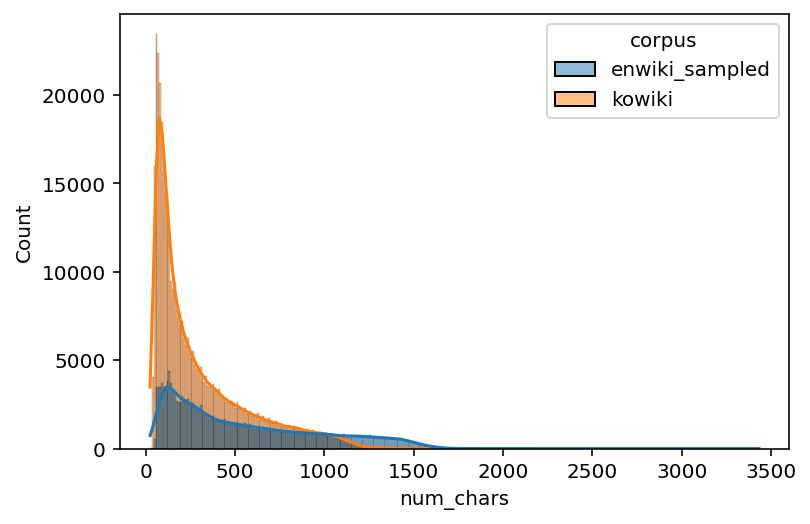

time: 5.72 s (started: 2022-11-04 07:07:22 +00:00)


In [11]:
# Histogram
sns.histplot(data=enko_filtered, x="num_chars", hue="corpus", kde=True)

<AxesSubplot:xlabel='num_words', ylabel='Count'>

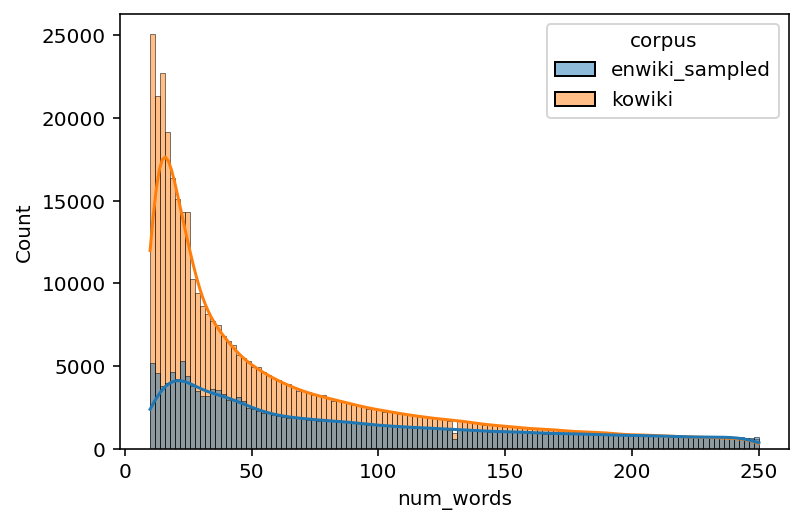

time: 4.3 s (started: 2022-11-04 07:07:30 +00:00)


In [12]:
# Histogram
sns.histplot(data=enko_filtered, x="num_words", hue="corpus", kde=True)

In [13]:
# Sentence counts
enko_filtered["num_sents"] = enko_filtered["text"].map(lambda x: len(sent_tokenize(x)))

time: 1min 29s (started: 2022-11-04 07:07:44 +00:00)


<AxesSubplot:xlabel='num_sents', ylabel='Count'>

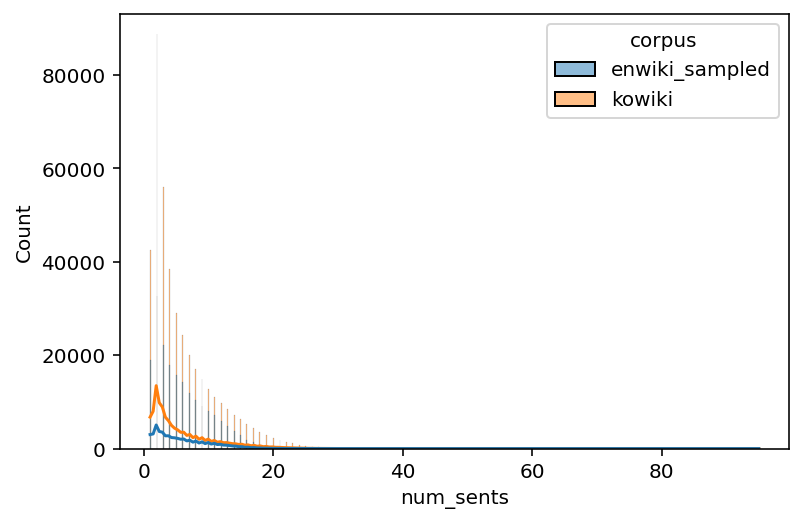

time: 7.09 s (started: 2022-11-04 07:09:42 +00:00)


In [14]:
# Histogram
sns.histplot(data=enko_filtered, x="num_sents", hue="corpus", kde=True)

In [15]:
# Average number of characters per word
enko_filtered["avg_num_chars"] = enko_filtered["num_chars"] / enko["num_words"]

time: 191 ms (started: 2022-11-04 07:09:50 +00:00)


<AxesSubplot:xlabel='avg_num_chars', ylabel='Count'>

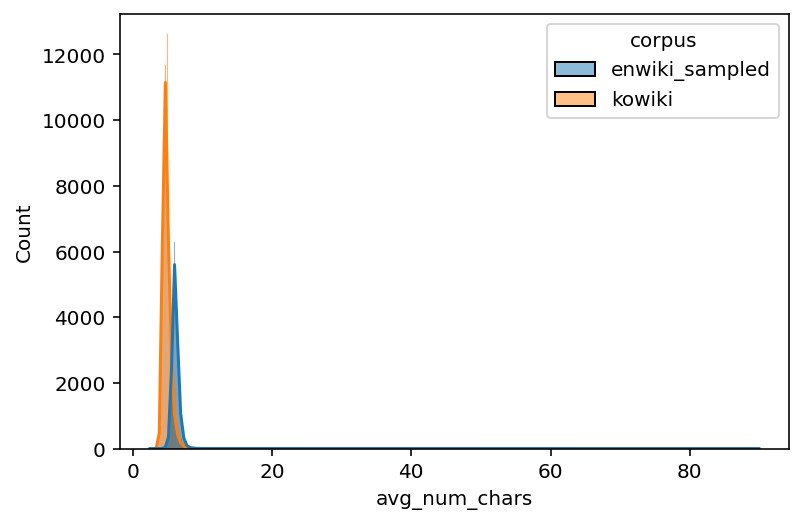

time: 16 s (started: 2022-11-04 07:09:51 +00:00)


In [16]:
# Histogram
sns.histplot(data = enko_filtered, x = "avg_num_chars", hue = "corpus", kde = True)

In [21]:
# Average number of words per sentence
enko_filtered["avg_num_words"] = enko_filtered["num_words"] / enko_filtered["num_sents"]

time: 3.03 ms (started: 2022-11-04 07:11:59 +00:00)


<AxesSubplot:xlabel='avg_num_words', ylabel='Count'>

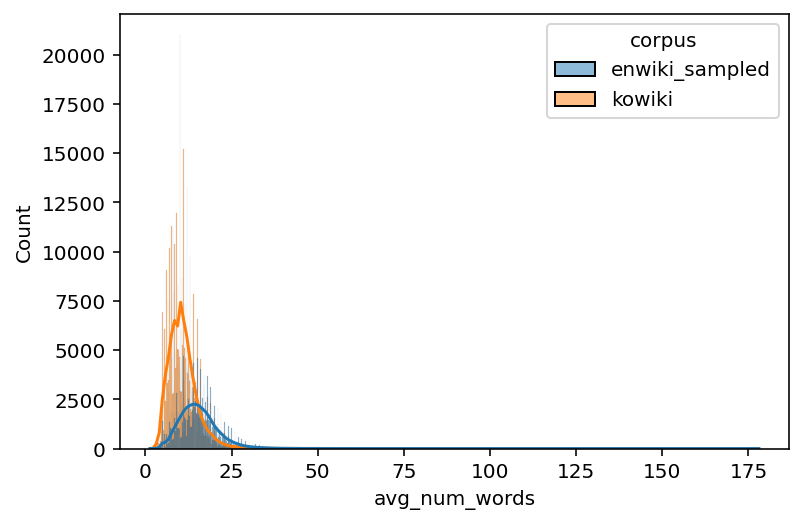

time: 9.31 s (started: 2022-11-04 07:12:01 +00:00)


In [22]:
# Histogram
sns.histplot(data=enko_filtered, x="avg_num_words", hue="corpus", kde=True)

In [23]:
# save filtered data

eKonf.save_data(enko_filtered, "enko_filtered.parquet", project_dir + "/data")

INFO:ekorpkit.io.file:Saving dataframe to /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/enko_filtered.parquet


time: 30.7 s (started: 2022-11-04 07:12:11 +00:00)


## Term Frequency Analysis

In [24]:
# lower case
enko_filtered["text"] = enko_filtered["text"].map(lambda x: x.lower())

time: 1.19 s (started: 2022-11-04 07:12:44 +00:00)


In [ ]:
enko_filtered.info()

In [ ]:
enko_filtered = enko_filtered.sample(frac=0.01)

In [ ]:
enko_filtered.info()

In [25]:
# get all words of english and korean corpus

words_en = sum(
    enko_filtered[enko_filtered.corpus == "enwiki_sampled"]["text"]
    .str.split()
    .tolist(),
    [],
)

In [ ]:
words_ko = sum(
    enko_filtered[enko_filtered.corpus == "kowiki"]["text"].str.split().tolist(), []
)

In [ ]:
from collections import Counter

counter_en = Counter(words_en)
counter_ko = Counter(words_ko)

In [ ]:
# top 10 words in english corpus

counter_en.most_common(10)

In [ ]:
# top 10 words in korean corpus

counter_ko.most_common(10)

In [ ]:
# Plot 20 most common words after removing top 20 common words
import matplotlib.pyplot as plt

most_common_en = counter_en.most_common()[20:40]
most_common_ko = counter_ko.most_common()[20:40]


# Change the font to Korean font
# You may need to install the font first
plt.rcParams["font.family"] = "NanumGothic"

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.bar(range(20), [x[1] for x in most_common_en])
plt.xticks(range(20), [x[0] for x in most_common_en], rotation=90)
plt.title("English")

plt.subplot(1, 2, 2)
plt.bar(range(20), [x[1] for x in most_common_ko])
plt.xticks(range(20), [x[0] for x in most_common_ko], rotation=90)
plt.title("Korean")

plt.show()

## Most Frequent N-Grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vec_en = CountVectorizer(ngram_range=(2, 2))
vec_ko = CountVectorizer(ngram_range=(2, 2))

# Fit and transform
ngram_counts_en = vec_en.fit_transform(
    enko_filtered[enko_filtered.corpus == "enwiki_sampled"]["text"]
)
ngram_counts_ko = vec_ko.fit_transform(
    enko_filtered[enko_filtered.corpus == "kowiki"]["text"]
)

# Get the n-gram counts
ngram_counts_en = ngram_counts_en.sum(axis=0).A1
ngram_counts_ko = ngram_counts_ko.sum(axis=0).A1

# Create a DataFrame
ngram_counts_df_en = pd.DataFrame(
    sorted(zip(vec_en.get_feature_names(), ngram_counts_en), key=lambda x: x[1], reverse=True),
    columns=["ngram", "count"],
)
ngram_counts_df_ko = pd.DataFrame(
    sorted(zip(vec_ko.get_feature_names(), ngram_counts_ko), key=lambda x: x[1], reverse=True),
    columns=["ngram", "count"],
)

In [ ]:
# plot 20 most common n-grams

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.bar(range(20), ngram_counts_df_en["count"][:20])
plt.xticks(range(20), ngram_counts_df_en["ngram"][:20], rotation=90)
plt.title("English")

plt.subplot(1, 2, 2)
plt.bar(range(20), ngram_counts_df_ko["count"][:20])
plt.xticks(range(20), ngram_counts_df_ko["ngram"][:20], rotation=90)
plt.title("Korean")

plt.show()

## Word Cloud

In [ ]:
# Function for generating word clouds
from wordcloud import WordCloud


def generate_wordcloud(
    data,
    title,
    width=400,
    height=330,
    max_words=150,
    figsize=(10, 8),
    colormap="Dark2",
    background_color="white",
):
    wc = WordCloud(
        width=width,
        height=height,
        max_words=max_words,
        colormap=colormap,
        background_color=background_color,
    ).generate_from_frequencies(data)
    plt.figure(figsize=figsize)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=13)
    plt.show()

In [ ]:
# Generate word clouds

# English
generate_wordcloud(
    dict(counter_en.most_common(20)),
    "English",
)

# Korean
generate_wordcloud(
    dict(counter_ko.most_common(20)),
    "Korean",
)

In [ ]:
# Generate word clouds for n-grams

# English
generate_wordcloud(
    dict(ngram_counts_df_en.set_index("ngram")["count"]),
    "English",
)

# Korean
generate_wordcloud(
    dict(ngram_counts_df_ko.set_index("ngram")["count"]),
    "Korean",
)